<h1 align="center"><font size="5">Final Project: House Sales in King County, USA </font></h1>

# Introduction

In this project, I explore housing prices in King County, USA, utilizing data from house sales between May 2014 and May 2015. The primary goal is to **build predictive models** that can estimate the market price of a house based on a set of features such as square footage, number of bedrooms, and other attributes.

The analysis begins with data preprocessing and exploratory data analysis (EDA) to understand the data structure and relationships between variables. Following this, various predictive modeling techniques, including Linear Regression and Ridge Regression, are employed to predict housing prices.

<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
    <li><a href="#Introduction">Introduction</a></li>
    <li><a href="#About-the-Dataset">About the Dataset</a></li>
    <li><a href="#Module-1:-Importing-Data-Sets">Module 1: Importing Data </a></li>
    <li><a href="#Module-2:-Data-Wrangling">Module 2: Data Wrangling</a> </li>
    <li><a href="#Module-3:-Exploratory-Data-Analysis">Module 3: Exploratory Data Analysis</a></li>
    <li><a href="#Module-4:-Model-Development">Module 4: Model Development</a></li>
    <li><a href="#Module-5:-Model-Evaluation-and-Refinement">Module 5: Model Evaluation and Refinement</a></li>
    <li><a href="#Conclusion">Conclusion</a></li>
</a></li>
</div>
</div>

<hr>

# About the Dataset

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. It was taken from [here](https://www.kaggle.com/harlfoxem/housesalesprediction?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-wwwcourseraorg-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01). It was also slightly modified for the purposes of the course. 

| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |

## **Importing the required libraries**

In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [2]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Module 1: Importing Data Sets

Download the dataset by running the cell below.

In [4]:
import requests

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)

download("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv", "housing.csv")

In [5]:
file_name="housing.csv"

Load the csv:

In [6]:
df = pd.read_csv(file_name)

We use the method <code>head</code> to display the first 5 columns of the dataframe.

In [7]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


We display the data types of each column using the function dtypes, then use the method describe to obtain a statistical summary of the dataframe.

In [8]:
print(df.dtypes)

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [9]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Module 2: Data Wrangling

Dropping the columns <code>"id"</code>  and <code>"Unnamed: 0"</code> from axis 1 using the method <code>drop()</code>, then using the method <code>describe()</code> to obtain a statistical summary of the data. The <code>inplace</code> parameter is set to <code>True</code>.

In [10]:
df.drop(['id', 'Unnamed: 0'], axis=1, inplace=True)

statistical_summary = df.describe()

statistical_summary

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Module 3: Exploratory Data Analysis

Using the method <code>value_counts</code> to count the number of houses with unique floor values, and the method <code>.to_frame()</code> to convert it to a data frame.

In [11]:
floors_count = df['floors'].value_counts().to_frame()

floors_count.columns = ['Number of Houses']

print(floors_count)

        Number of Houses
floors                  
1.0                10680
2.0                 8241
1.5                 1910
3.0                  613
2.5                  161
3.5                    8


Using the function <code>boxplot</code> in the seaborn library  to  determine whether houses with a waterfront view or without a waterfront view have more price outliers.

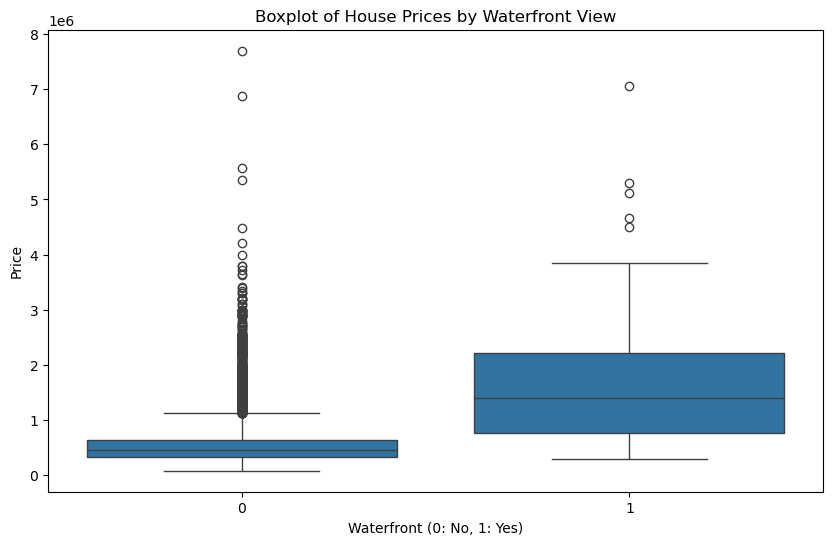

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='waterfront', y='price', data=df)
plt.title('Boxplot of House Prices by Waterfront View')
plt.xlabel('Waterfront (0: No, 1: Yes)')
plt.ylabel('Price')
plt.show()

Using the function <code>regplot</code>  in the seaborn library  to  determine if the feature <code>sqft_above</code> is negatively or positively correlated with price.

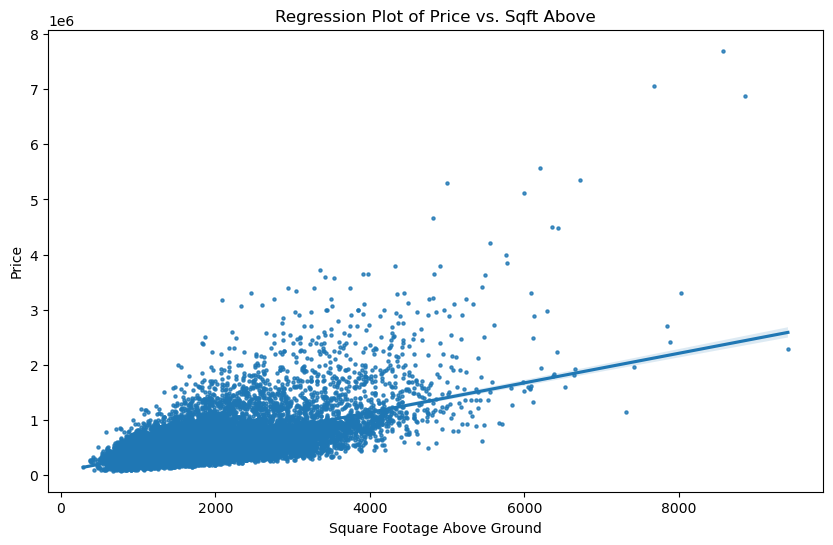

In [13]:
plt.figure(figsize=(10, 6))
sns.regplot(x='sqft_above', y='price', data=df, scatter_kws={'s': 5})
plt.title('Regression Plot of Price vs. Sqft Above')
plt.xlabel('Square Footage Above Ground')
plt.ylabel('Price')
plt.show()

We can drop the date column and any other non-numeric columns before calculating the correlation. With only numeric data, we can then compute the correlation matrix.

In [14]:
df_numeric = df.drop(columns=['date'])

correlation_matrix = df_numeric.corr()

print(correlation_matrix['price'].sort_values(ascending=False))

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525885
view             0.397293
sqft_basement    0.323816
bedrooms         0.308890
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64


The correlation values indicate how strongly each feature is associated with the target variable, `price`. The closer the value is to 1 or -1, the stronger the positive or negative correlation, respectively.

# Module 4: Model Development

We can fit a linear regression model using the  longitude feature <code>'long'</code> and  caculate the R^2.

In [15]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

To improve prediction accuracy, I expanded the model to include multiple features, selected based on their relevance and correlation with house prices. Next we can fit a linear regression model to predict the <code>'price'</code> using the feature <code>'sqft_living'</code> then calculate the R^2.

In [16]:
X = df[['sqft_living']]
y = df['price']

lm = LinearRegression()
lm.fit(X, y)

R2_sqft_living = lm.score(X, y)
print(f'R^2 value for sqft_living: {R2_sqft_living}')

R^2 value for sqft_living: 0.4928532179037931


## Feature Engineering and Model Training

In this section, I explore the impact of multiple features on predicting house prices using a Linear Regression model. Initially, I selected a comprehensive list of features that I believed would significantly influence the target variable, 'price'. These features include:

- **floors**
- **waterfront**
- **lat**
- **bedrooms**
- **sqft_basement**
- **view**
- **bathrooms**
- **sqft_living15**
- **sqft_above**
- **grade**

In [17]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     

Checking for any missing values.

In [18]:
print("Missing values per column:")
print(df[features].isnull().sum())

Missing values per column:
floors            0
waterfront        0
lat               0
bedrooms         13
sqft_basement     0
view              0
bathrooms        10
sqft_living15     0
sqft_above        0
grade             0
sqft_living       0
dtype: int64


Dataset contains NaN values, which the Linear Regression model cannot handle natively. We need to handle these missing values before fitting the model. This approach preserves the dataset's integrity without significantly skewing the data distribution. With a clean dataset, I proceeded to build the Linear Regression model using the defined features. 

In [19]:
for column in features:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)

X_multi = df[features]
y_multi = df['price']

lm_multi = LinearRegression()
lm_multi.fit(X_multi, y_multi)

R2_multi = lm_multi.score(X_multi, y_multi)
print(f'R^2 value for multiple features: {R2_multi}')

R^2 value for multiple features: 0.6577002213435383


This indicates that about **65.8%** of the variance in housing prices can be explained by these selected features.

This result demonstrates a relatively strong relationship between the chosen independent variables and the target variable, 'price'. The model's ability to explain a significant portion of the price variance suggests that the included features are relevant and have a substantial impact on house valuation.

## Enhancing the Model with Polynomial Features

To further refine the predictive capabilities of the model, I constructed a pipeline that includes standard scaling and polynomial feature transformation, followed by Linear Regression. This pipeline ensures that the data is appropriately scaled and that non-linear interactions are considered.

List of tuples, the first element in the tuple contains the name of the estimator:

<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple  contains the model constructor

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>


In [20]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

Using the list to create a pipeline object to predict the 'price', I fit the object using the features in the list <code>features</code>, and calculate the R^2.

In [21]:
pipe = Pipeline(Input)

pipe.fit(X_multi, y_multi)

R2_pipeline = pipe.score(X_multi, y_multi)
print(f'R^2 value for pipeline model: {R2_pipeline}')

R^2 value for pipeline model: 0.7513406972998302


After fitting the pipeline, which included `StandardScaler()`, `PolynomialFeatures(include_bias=False)`, and `LinearRegression()`, the model achieved an R² value of approximately 0.751. This indicates that the enhanced model can explain about 75.1% of the variance in the housing prices based on the features provided.

# Module 5: Model Evaluation and Refinement

Import the necessary modules:

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

We will split the data into training and testing sets:

In [23]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


To address potential overfitting issues encountered with the linear regression model, I implemented Ridge Regression, which applies L2 regularization. This method helps in penalizing large coefficients, thus simplifying the model and improving generalization.

The Ridge model was trained using a regularization parameter (alpha) of 0.1.

In [24]:
from sklearn.linear_model import Ridge

In [25]:
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(x_train, y_train)

R2_ridge_test = ridge_model.score(x_test, y_test)
print(f'R^2 value for Ridge Regression (alpha=0.1) on test data: {R2_ridge_test}')

R^2 value for Ridge Regression (alpha=0.1) on test data: 0.6478967743507851


When evaluated on the test data, the model achieved an R² value of approximately 0.648. This indicates that the Ridge model is capable of explaining around 64.8% of the variance in house prices. The slight reduction in R² compared to the unregularized model suggests a trade-off between model complexity and generalizability.

However, this trade-off is acceptable as it likely results in a model that better generalizes to unseen data.

## Polynomial Features with Ridge Regression

To further refine the model, I incorporated polynomial features of degree 2 into the Ridge Regression framework. This combination allows the model to capture non-linear interactions among features while maintaining regularization to prevent overfitting.

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

poly_ridge_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('ridge_regression', Ridge(alpha=0.1))
])

poly_ridge_pipeline.fit(x_train, y_train)

R2_poly_ridge_test = poly_ridge_pipeline.score(x_test, y_test)
print(f'R^2 value for Polynomial Ridge Regression (degree=2, alpha=0.1) on test data: {R2_poly_ridge_test}')

R^2 value for Polynomial Ridge Regression (degree=2, alpha=0.1) on test data: 0.7002634370377425


The pipeline, which included polynomial feature expansion and Ridge Regression, was evaluated on the test data, yielding an R² value of approximately 0.700. This result suggests an improved model performance compared to the Ridge model without polynomial features, as it explains about 70.0% of the variance in the target variable. The use of polynomial features thus enhances the model's ability to capture complex patterns in the data, leading to better predictive accuracy.

## Conclusion

Throughout this analysis, I explored various linear and non-linear regression techniques to model housing prices in King County. The process began with simple linear regression and evolved to more sophisticated methods, including Ridge Regression and Polynomial Ridge Regression, to improve model accuracy and prevent overfitting.

Key findings include:

1. **Feature selection importance:** The choice of features significantly impacts the model's explanatory power, as seen by the initial R² values obtained with basic linear regression.
2. **Regularization:** Ridge Regression effectively mitigates overfitting, balancing model complexity with generalizability, as demonstrated by an R² value of 0.648.
3. **Non-Linear relationships:** Incorporating polynomial features captures non-linear interactions among variables, further enhancing model performance. The final Polynomial Ridge Regression model achieved an R² value of 0.700, indicating a substantial improvement in explaining the variance in housing prices.

While the final model provides a robust prediction capability, future work could involve exploring additional regularization techniques, incorporating more features, or employing advanced machine learning algorithms such as Gradient Boosting Machines or Neural Networks. These steps could potentially enhance predictive accuracy further, providing even greater insights into the factors influencing housing prices.